## Understanding the DT$\mathbb{C}$WT
This notebook demonstrates what decomposing data into the DT$\mathbb{C}$WT actually does! \\
Note there are 1D, 2D and 3D versions of this wavelet transform. Analagous to the 1D case, the basis of multidimensional wavelet transform is built by stretching, shifting, and *rotating* the mother function. For motion magnification of an image sequence, the **2D** version is used, not 3D.

In [ ]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
%pip install dtcwt
import dtcwt
from google.colab import drive  # Access google drive files
drive.mount('/content/gdrive')

First, let us create a simple numpy array containing a ring, which will demonstrate the directional properties of the DT$\mathbb{C}$WT.

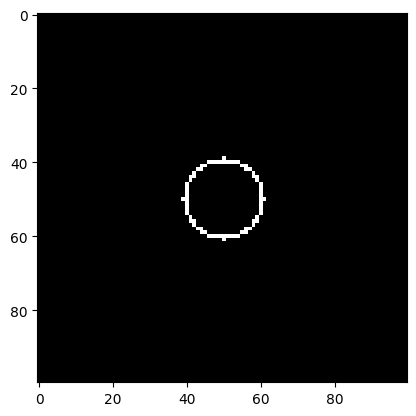

In [ ]:
# Define the dimensions of the array
width, height = 100, 100

ring = np.zeros((width, height))

radius = 10   # inner radius of ring in pixels. Ring will have width of 1 pixel.
center_x = int(width / 2)
center_y = int(height / 2)

# Create a meshgrid of coordinates
x, y = np.meshgrid(np.arange(width), np.arange(height))

# Calculate the distance from each point to the center of the circle
distance = np.sqrt((x - center_x) ** 2 + (y - center_y) ** 2)

# Assign a value of 1 to points inside the circle
ring[(distance >= radius) & (distance <= radius + 1)] = 1

# Plot all the frames
plt.figure(1)
plt.imshow(ring, cmap='gray')

Now we will decompose into DT$\mathbb{C}$WT components. Recall the DT$\mathbb{C}$WT consists of six subbands per scale, for a specified number of scales (`levels`), and each coefficient within the subband is complex (i.e. it has a real and imaginary part).

For this example we will use 3 levels.

Shape of highpass level 0 is: (50, 50, 6)
Shape of highpass level 1 is: (25, 25, 6)
Shape of highpass level 2 is: (13, 13, 6)


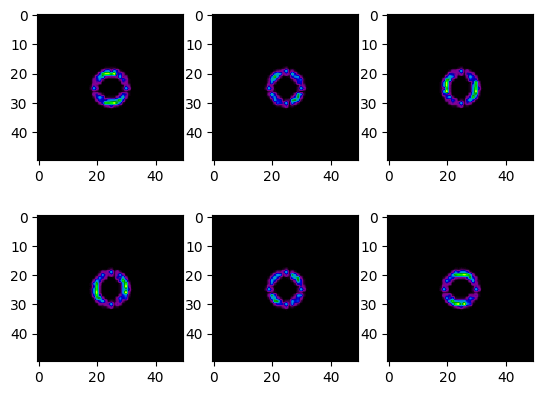

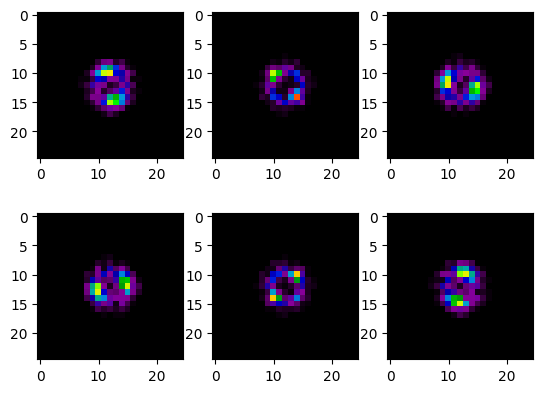

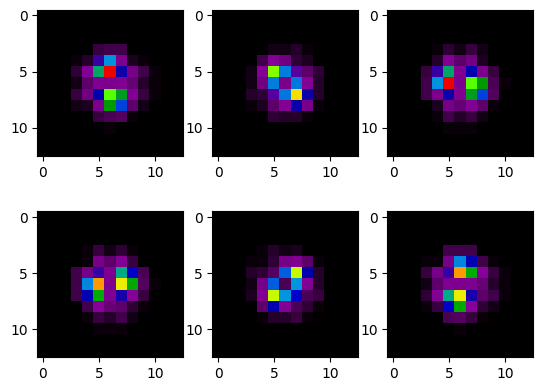

In [ ]:
transform = dtcwt.Transform2d() # near_sym_a, qshift_a

# Compute four levels of dtcwt with the default wavelet family
decomp = transform.forward(ring, nlevels=3)

print('Shape of highpass level 0 is: ' + str(decomp.highpasses[0].shape))
print('Shape of highpass level 1 is: ' + str(decomp.highpasses[1].shape))
print('Shape of highpass level 2 is: ' + str(decomp.highpasses[2].shape))

# Compare absolute images for level 0
plt.figure(2)
for slice_idx in range(decomp.highpasses[0].shape[2]): # This range is always 6
    plt.subplot(2, 3, slice_idx+1)
    plt.imshow(np.abs(decomp.highpasses[0][:,:,slice_idx]), clim=(0, 1), cmap="nipy_spectral")

# Compare absolute images for level 1
plt.figure(3)
for slice_idx in range(decomp.highpasses[1].shape[2]):
    plt.subplot(2, 3, slice_idx+1)
    plt.imshow(np.abs(decomp.highpasses[1][:,:,slice_idx]), clim=(0, 1), cmap="nipy_spectral")

# Compare absolute images for level 2
plt.figure(4)
for slice_idx in range(decomp.highpasses[2].shape[2]):
    plt.subplot(2, 3, slice_idx+1)
    plt.imshow(np.abs(decomp.highpasses[2][:,:,slice_idx]), clim=(0, 1), cmap="nipy_spectral")

Remember that each coefficient is complex, so it has both an magnitude and phase. It is the *phase* which is modified with MM, so let us take a look.

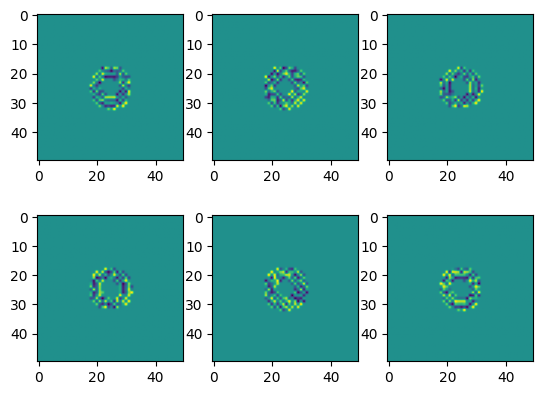

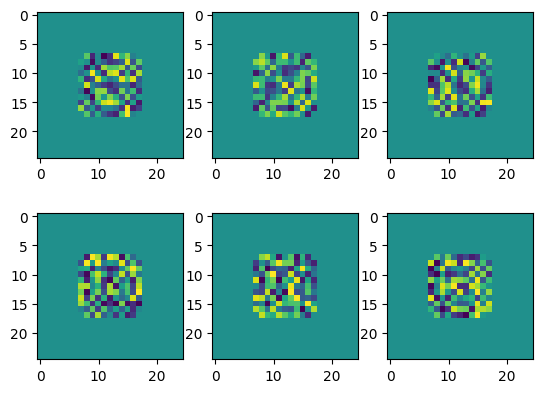

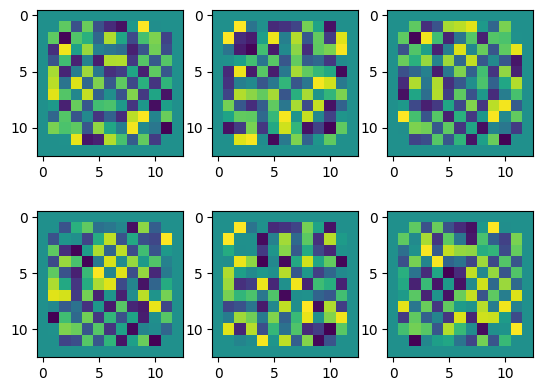

In [ ]:
# Show the phase images for each direction in levels 0 vs 2.
plt.figure(5)
for slice_idx in range(decomp.highpasses[0].shape[2]):  # This range is always 6
    plt.subplot(2, 3, slice_idx+1)
    plt.imshow(np.angle(decomp.highpasses[0][:,:,slice_idx]), cmap='viridis', clim=(-np.pi, np.pi))

plt.figure(6)
for slice_idx in range(decomp.highpasses[1].shape[2]):
    plt.subplot(2, 3, slice_idx+1)
    plt.imshow(np.angle(decomp.highpasses[1][:,:,slice_idx]), cmap='viridis', clim=(-np.pi, np.pi))

plt.figure(7)
for slice_idx in range(decomp.highpasses[2].shape[2]):
    plt.subplot(2, 3, slice_idx+1)
    plt.imshow(np.angle(decomp.highpasses[2][:,:,slice_idx]), cmap='viridis', clim=(-np.pi, np.pi))

Note that the DT$\mathbb{C}$WT also retains a lowpass signal, which the MM routine does not meddle with. Being simply a float, we can display this directly.

float64


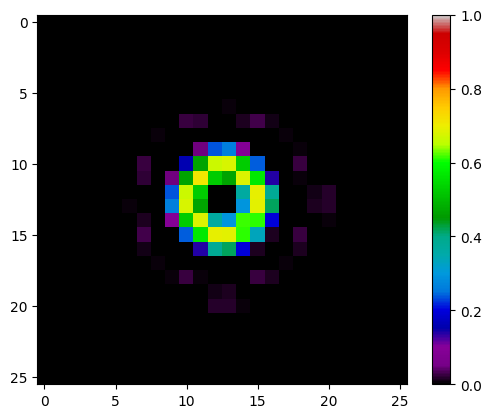

In [ ]:
print(decomp.lowpass.dtype) # Check low pass is not complex
plt.figure(4)
plt.imshow(decomp.lowpass, cmap="nipy_spectral", clim=(0, 1))
plt.colorbar()

I hope that has illustrated what the dual tree complex wavelet transform looks like. You may wish to check the shift invariant property of the transform, by changing the position of the ring and seeing if the transform is much different.


# Bonus: a dog!
Since we can decompose any image, indulge me and let us use a picture of my dog! She is called Daphne, a rescue I got a few months ago.

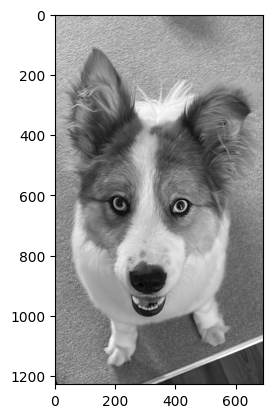

In [ ]:
import cv2
from google.colab.patches import cv2_imshow  # Colab does not play well with cv2.
daphne = cv2.imread('/content/gdrive/MyDrive/daphne.jpg', cv2.IMREAD_GRAYSCALE)
plt.figure(1)
plt.imshow(daphne, cmap='gray')

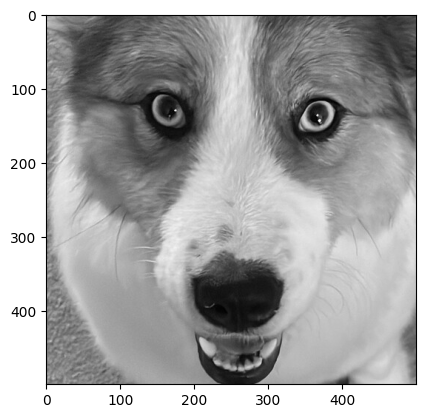

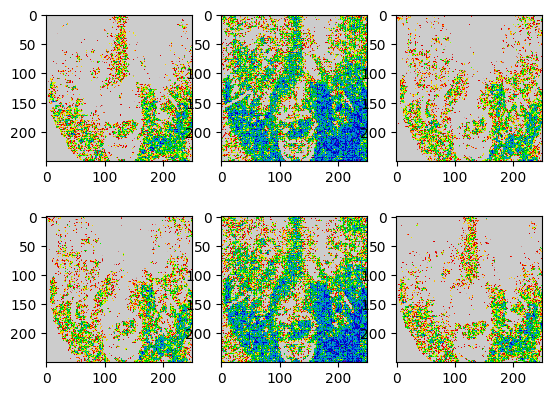

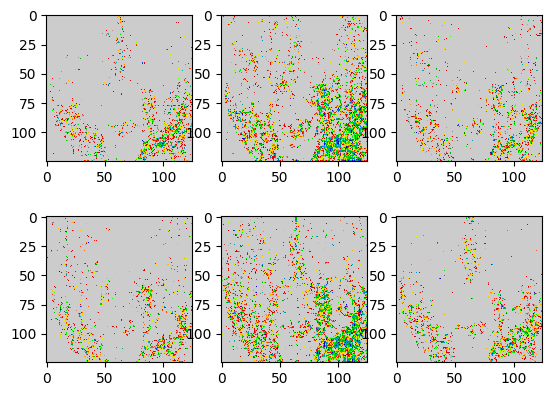

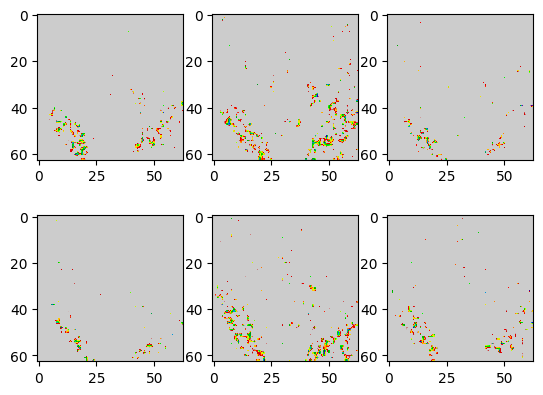

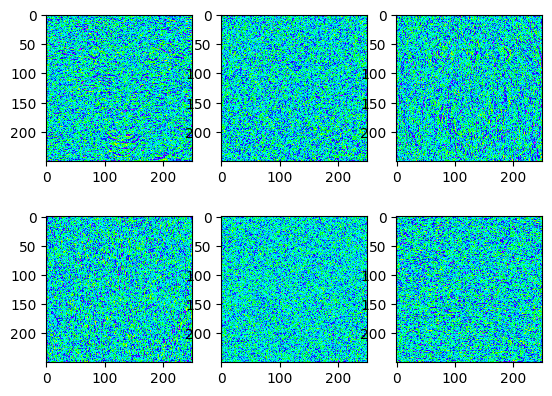

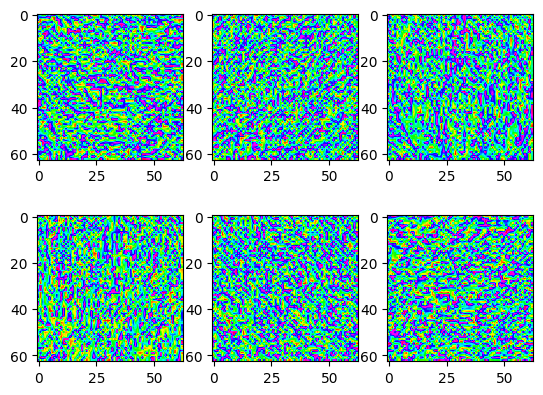

In [ ]:
dog = daphne[:,:-1] # Need an even number of pixels

transform = dtcwt.Transform2d()

plt.imshow(dog[500:1000,50:550], cmap=cm.gray)

# Compute four levels of dtcwt with the default wavelet family
dog_t = transform.forward(dog[500:1000,50:550], nlevels=4)

# Compare absolute images for level 0
plt.figure(2)
for slice_idx in range(dog_t.highpasses[0].shape[2]):
    plt.subplot(2, 3, slice_idx+1)
    plt.imshow(np.abs(dog_t.highpasses[0][:,:,slice_idx]), clim=(0, 1), cmap="nipy_spectral") #cmap=cm.spectral

# Compare absolute images for level 1
plt.figure(3)
for slice_idx in range(dog_t.highpasses[1].shape[2]):
    plt.subplot(2, 3, slice_idx+1)
    plt.imshow(np.abs(dog_t.highpasses[1][:,:,slice_idx]), clim=(0, 1), cmap="nipy_spectral") #cmap=cm.spectral

# Show the absolute images for each direction in level 2.
# Note that the 2nd level has index 1 since the 1st has index 0. (?!)
plt.figure(4)
for slice_idx in range(dog_t.highpasses[2].shape[2]):
    plt.subplot(2, 3, slice_idx+1) # Do not know why but need to add 1 to index
    plt.imshow(np.abs(dog_t.highpasses[2][:,:,slice_idx]), clim=(0, 1), cmap="nipy_spectral") #cmap=cm.spectral

# Show the phase images for each direction in levels 0 vs 2.
plt.figure(5)
for slice_idx in range(dog_t.highpasses[0].shape[2]):
    plt.subplot(2, 3, slice_idx+1)
    plt.imshow(np.angle(dog_t.highpasses[0][:,:,slice_idx]), cmap=cm.hsv, clim=(-np.pi, np.pi))

plt.figure(6)
for slice_idx in range(dog_t.highpasses[2].shape[2]):
    plt.subplot(2, 3, slice_idx+1)
    plt.imshow(np.angle(dog_t.highpasses[2][:,:,slice_idx]), cmap=cm.hsv, clim=(-np.pi, np.pi))


I think Daphne is cute, even in transform space!

# Choice in wavelet
Being a wavelet transform, there is also a choice of mother wavelet. Of course in this case, the transform is based on two separate two-channel filter banks.
A suitable choice of these filter banks will allow the transform its most useful properties:

1.   Perfect reconstruction
2.   Shift invariance, i.e. A small shift of image not leading to a drastic redistribution of energy between scales.
3.   Phase difference $\Delta \phi =\phi (H^{t_2}_s)−\phi (H^{t_1}_s)$ of a (high-pass) complex coefficient between two frames is  **linearly proportional** to the displacement orthogonal to the subband orientation (assuming absolute values and low pass residual remains constant, i.e. slow variation).

It has been shown that to satisfy these conditions, the filter banks are be related to each other by their Hilbert transforms, broadly speaking $H$(high-pass Tree1) $\propto$ $H$(low-pass Tree2) etc. This makes the transform approximately analytic. See  [Kingsbury 2001](http://www.sciencedirect.com/science/article/pii/S1063520300903439) for more information on how to formulate these filter banks (warning, it is quite technical!)

From the DT$\mathbb{C}$WT implementation in Python used here, we have a choice of several  filter banks for our transform. As with the traditional 1D wavelet case, there is a tradeoff between localisation in the spatial domain vs localisation in the wavenumber domain. For example, in some cases one may prefer longer filters to get great spectral resolution (which will lead to weaker distortion at high magnification factors), but sacrificing the ability to discern different motions in structures close by to each other.

\\

You may wish to explore this effect by comparing the previous result with that using the longer filters `near_sym_b`,  `qshift_d`.

---
Another reason we may want a different set of wavelets is to prioritise rotational similarity. You may notice the "standard" wavelets have a funny property in that the 45° and 135° subbands have central frequencies further from the origin compared to the other 4 subbands, see the below figure ([Kingsbury 2006](https://ieeexplore.ieee.org/document/7071567)).

(-0.5, 581.5, 264.5, -0.5)

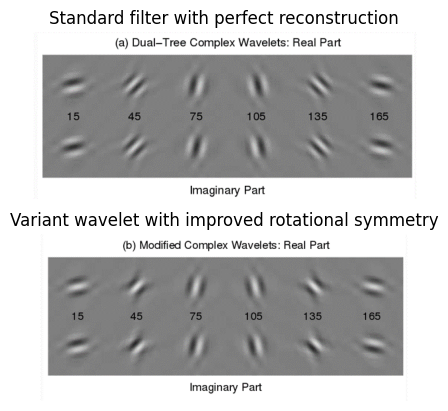

In [ ]:
import cv2
# import matplotlib.pyplot as plt

img_DTWCTstandard = cv2.imread("/content/gdrive/MyDrive/DTCWT_standard_response.png")
img_DTWCTsymvar = cv2.imread("/content/gdrive/MyDrive/DTCWT_symmvariant_response.png")

f, axarr = plt.subplots(2, sharex=True)
axarr[0].imshow(img_DTWCTstandard)
axarr[0].set_title('Standard filter with perfect reconstruction')
axarr[0].axis("off")
axarr[0].axis("tight")
axarr[0].axis("image")
axarr[1].imshow(img_DTWCTsymvar)
axarr[1].set_title('Variant wavelet with improved rotational symmetry')
axarr[1].axis("off")
axarr[1].axis("tight")
axarr[1].axis("image")

As you can see, to alleviate this an alternative set of filters was derived in [Kingsbury 2006](https://ieeexplore.ieee.org/document/7071567) chosen such that there is greater rotational symmetry (the bottom filter responses shown). \\
Of course, nothing comes for free...

In [ ]:
# Use the standard 2-D DTCWT
transform = dtcwt.Transform2d()

# Forward transform
transformed_dog = transform.forward(dog)

# Inverse transform
out_dog = transform.inverse(transformed_dog)

# Show the error
plt.imshow(out_dog - dog, cmap='gray')
plt.colorbar()

ModuleNotFoundError: ignored

As you can see, the error is negligible and can be attributed to floating point (im)precision. The standard transform has 'perfect' reconstruction. \\
Now we try a different variant.

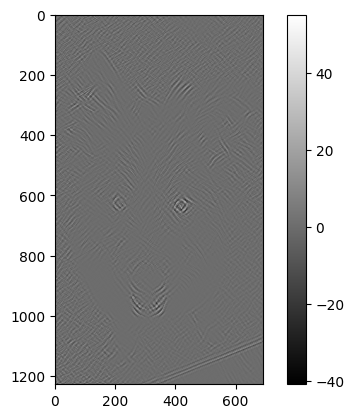

In [ ]:
# Use a variant of the 2-D DTCWT: "Near-Symmetric 13,19 tap filters + BP filter"
transform = dtcwt.Transform2d(biort='near_sym_b_bp', qshift='qshift_b_bp')

# Forward transform
transformed_dog = transform.forward(dog)

# Inverse transform
out_dog = transform.inverse(transformed_dog)

# Show the error
plt.imshow(out_dog - dog, cmap='gray')
plt.colorbar()

You can see the errors are much more substantial, but only near 45 and 135 degree edge features.
This more symmetric filter bank sacrifices the ability to perfectly reconstruct the image! Thus this choice should be used when all subsequent processing occurs only in the DT$\mathbb{C}$WT domain.
See [here](https://dtcwt.readthedocs.io/en/0.12.0/variant.html) for more information.

For motion magnification of solar images, the property of perfect reconstruction is more valuable than symmetry of the filters. Note that this is not true in many arenas in which this transform is being used, such as for image recognition algorithms, where all the processing is done in the wavenumber domain anyway.  \\
For those interested, in the MM routine we use here, the exact choice of filter bank is - Near-Symmetric 5/7 tap filters (`near_sym_a`) and Quarter SampleShift Orthogonal (Q-shift) 10/10 tap filters (`qshift_a`) because these have the shortest lengths and hence best spatial resolution.

# Registration using DTCWT
You can follow this tutorial [here](https://dtcwt.readthedocs.io/en/0.12.0/registration.html#algorithm-overview) for correcting a small shift between two images.
A good example of this would be for the Solar Orbiter data, and finding the velocity field on two frames of a Daphne video...

\\

Could also use [this link](https://dtcwt.readthedocs.io/en/0.12.0/image-registration.py) which should work with the example data inside the dtcwt directory. There is a even a specific .py file for it [here](https://github.com/rjw57/dtcwt/blob/master/examples/register_video.py).

In [ ]:
import dtcwt.registration as registration

# Upsampling the wavelet highpass coefficients

Show an example of how to re-sample high-pass DTCWT coefficients on the famous "mandrill" image.
This is adapted from the [dtcwt Python library by Dr Kingsbury](https://github.com/rjw57/dtcwt/tree/master/examples).

In [ ]:
%matplotlib inline
import dtcwt
import dtcwt.compat
import dtcwt.sampling
from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow

# This file is a copy of the famous 'mandrill' image of 512x512, floating point and has pixel
# values in the interval (0, 1].
mandrill = np.load('/content/gdrive/MyDrive/mandrill.npz')['mandrill']

mandrill = mandrill[24:152,324:452]  #[224:288,224:288]
# We will try to re-scale mandrill by this amount and method
scale = 2
scale_method = 'lanczos'

def scale_direct(im):
    """Scale image directly."""
    return dtcwt.sampling.rescale(im, (im.shape[0]*scale, im.shape[1]*scale), scale_method)

def scale_highpass(im):
    """Scale image assuming it to be wavelet highpass coefficients."""
    return dtcwt.sampling.rescale_highpass(im, (im.shape[0]*scale, im.shape[1]*scale), scale_method)

# Rescale mandrill directly using default (Lanczos) sampling
mandrill_direct = scale_direct(mandrill)
# Transform mandrill
mandrill_l, mandrill_h = dtcwt.compat.dtwavexfm2(mandrill, nlevels=4)

# Re-scale each component and transform back. Do this both with and without
# shifting back to DC.
mandrill_l = scale_direct(mandrill_l)
mandrill_h_a, mandrill_h_b = [], []

for h in mandrill_h:
    mandrill_h_a.append(scale_direct(h))
    mandrill_h_b.append(scale_highpass(h))

# Transform back
mandrill_a = dtcwt.compat.dtwaveifm2(mandrill_l, mandrill_h_a)
mandrill_b = dtcwt.compat.dtwaveifm2(mandrill_l, mandrill_h_b)

figure(figsize=(10,10))

subplot(2,2,1)
imshow(mandrill, cmap=cm.gray, clim=(0,1), interpolation='none')
axis('off')
title('Original')

subplot(2,2,2)
imshow(mandrill_direct, cmap=cm.gray, clim=(0,1), interpolation='none')
axis('off')
title('Directly up-sampled')

subplot(2,2,3)
imshow(mandrill_a, cmap=cm.gray, clim=(0,1), interpolation='none')
axis('off')
title('Up-sampled in the wavelet domain')

subplot(2,2,4)
imshow(mandrill_b, cmap=cm.gray, clim=(0,1), interpolation='none')
axis('off')
title('Up-sampled in the wavelet domain with shifting')

tight_layout()